# Week2 HW 김민회

## 0. EDA

In [1]:
import numpy as np; np.set_printoptions(precision=3)
import pandas as pd; pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
real = pd.read_csv('real.csv', index_col=0)
real.columns = ['date','house_age','dist_mrt','no_cvs','lat','long','price']
real

,date,house_age,dist_mrt,no_cvs,lat,long,price
No,,,,,,,
1,2012.917,32.0,84.879,10,24.983,121.540,37.9
2,2012.917,19.5,306.595,9,24.980,121.540,42.2
3,2013.583,13.3,561.985,5,24.987,121.544,47.3
4,2013.500,13.3,561.985,5,24.987,121.544,54.8
5,2012.833,5.0,390.568,5,24.979,121.542,43.1
...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.015,0,24.942,121.504,15.4
411,2012.667,5.6,90.456,9,24.974,121.543,50.0
412,2013.250,18.8,390.970,7,24.979,121.540,40.6


date: 거래 발생일 / house_age: 집 연식 / dist_mrt: 가까운 지하철 역과의 거리 / no_cvs: 근처 편의점 수 / lat,long: 위도,경도 / price: 거래가

In [3]:
real.sort_values(by=['price'], inplace=True)
real.reset_index(inplace=True) # inplace: replace the original dataset
real = real.drop(['No'], axis=1)
real

,date,house_age,dist_mrt,no_cvs,lat,long,price
0,2013.333,14.8,393.261,6,24.962,121.538,7.6
1,2013.583,17.4,6488.021,1,24.957,121.474,11.2
2,2012.750,16.0,4066.587,0,24.943,121.503,11.6
3,2013.000,30.9,6396.283,1,24.944,121.479,12.2
4,2013.083,32.0,1156.777,0,24.949,121.530,12.8
...,...,...,...,...,...,...,...
409,2012.833,0.0,292.998,6,24.977,121.545,71.0
410,2013.417,0.0,292.998,6,24.977,121.545,73.6
411,2013.583,35.4,318.529,9,24.971,121.541,78.0
412,2013.333,37.2,186.510,9,24.977,121.543,78.3


sort by price

In [4]:
real.describe()

,date,house_age,dist_mrt,no_cvs,lat,long,price
count,414.000,414.000,414.000,414.000,414.000,414.000,414.000
mean,2013.149,17.713,1083.886,4.094,24.969,121.533,37.980
std,0.282,11.392,1262.110,2.946,0.012,0.015,13.606
min,2012.667,0.000,23.383,0.000,24.932,121.474,7.600
25%,2012.917,9.025,289.325,1.000,24.963,121.528,27.700
50%,2013.167,16.100,492.231,4.000,24.971,121.539,38.450
75%,2013.417,28.150,1454.279,6.000,24.977,121.543,46.600
max,2013.583,43.800,6488.021,10.000,25.015,121.566,117.500


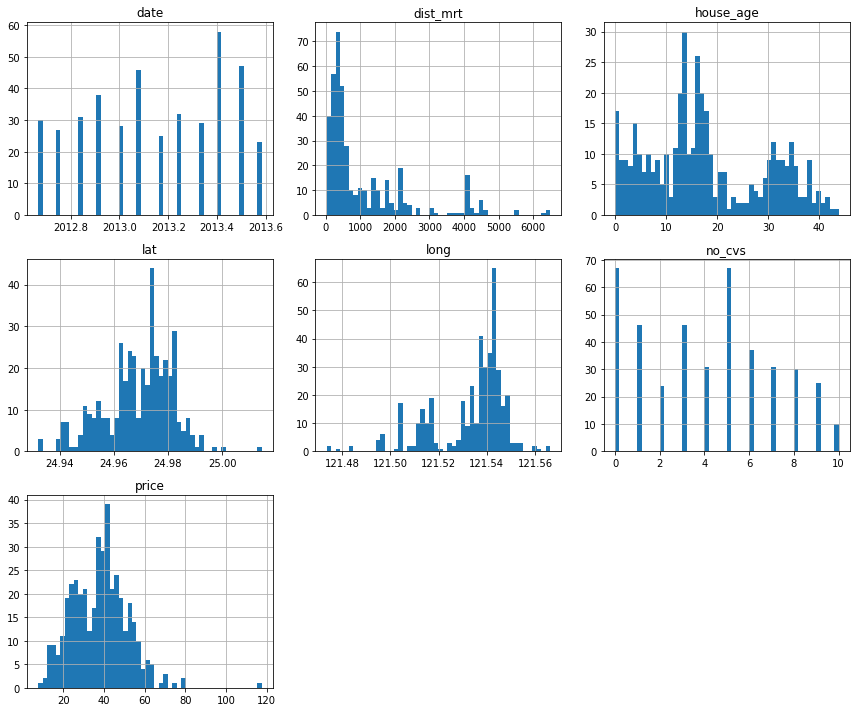

In [5]:
real.hist(bins=50, figsize=(12,10))
plt.tight_layout()

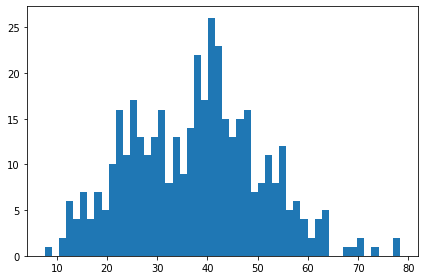

In [6]:
real = real[real.price < 80]
plt.hist(real.price, bins=50)
plt.tight_layout()

거래가 80 이상 제외

### 변수 간 관계 살펴보기

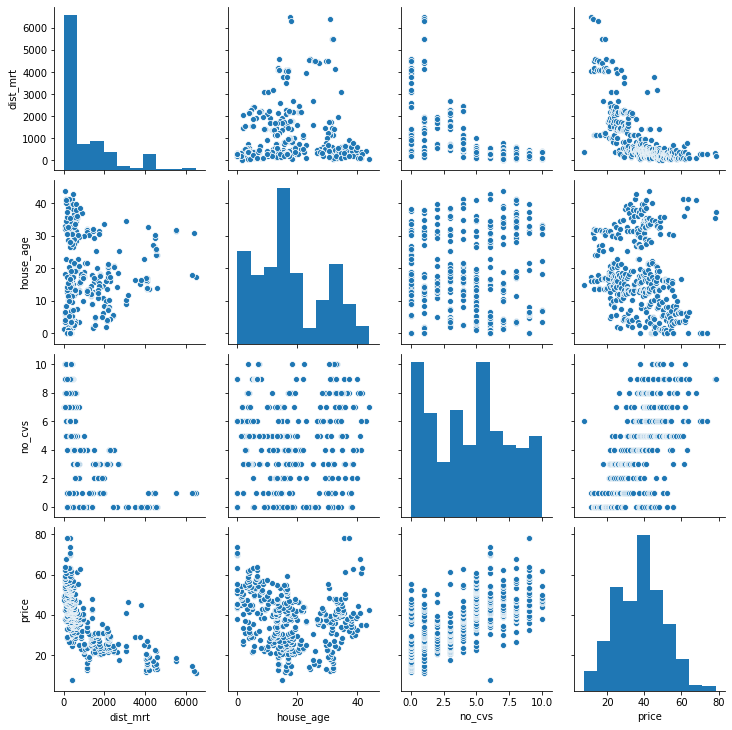

In [7]:
sns.pairplot(real[['dist_mrt', 'house_age', 'no_cvs', 'price']])

dist_mrt 변수가 혼자 skewed 되어 있으므로 bell shape으로 바꿔준다. 

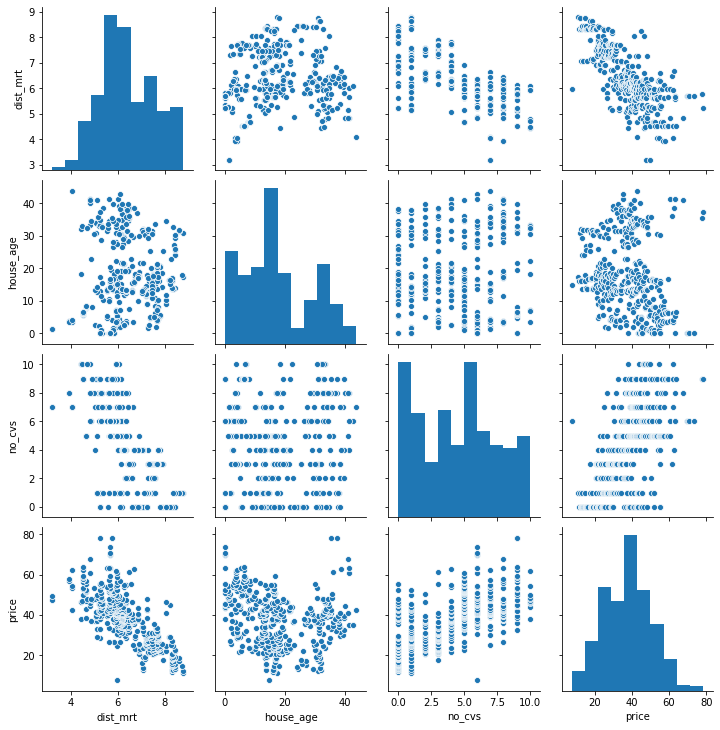

In [8]:
real2 = real.copy()
real2['dist_mrt'] = np.log(1+real.dist_mrt)
sns.pairplot(real2[['dist_mrt', 'house_age','no_cvs','price']])

# 1. Train-Test Split

In [9]:
data = real2[['dist_mrt', 'house_age','price']]

In [30]:
X = real2[['dist_mrt', 'house_age']]
Y = real2['price']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=415)

In [10]:
test = np.random.choice(np.arange(data.shape[0]), 82, replace = False)
train_df = data[~data.index.isin(test)].copy()
test_df = data[data.index.isin(test)].copy()
print(train_df.shape, test_df.shape)

(331, 3) (82, 3)


In [13]:
X_train = train_df[['dist_mrt', 'house_age']]
Y_train = train_df['price']
X_test = test_df[['dist_mrt', 'house_age']]
Y_test = test_df['price']

X_train.reset_index(drop = True, inplace = True)
Y_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
Y_test.reset_index(drop = True, inplace = True)

train:test = 8:2

# 2. Feature Extraction (scaling)

In [33]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)

def Scl_train(sclr, df):
    colnames = df.columns
    df = sclr.transform(df)
    df = pd.DataFrame(df)
    df.set_axis(colnames, axis=1, inplace=True)
    return df

스케일링: (전처리 과정) 모든 자료에 선형 변환을 가하여 자료의 분포를 평균 0, 분산 1이 되도록 한다. 

In [34]:
X_train_sc = Scl_train(scaler, X_train)
X_train_sc.describe()

,dist_mrt,house_age
count,2.890e+02,2.890e+02
mean,6.154e-16,1.137e-16
std,1.002e+00,1.002e+00
min,-2.848e+00,-1.521e+00
25%,-6.282e-01,-7.886e-01
50%,-1.533e-01,-1.174e-01
75%,8.067e-01,9.548e-01
max,2.156e+00,2.201e+00


In [35]:
X_test_sc = Scl_train(scaler, X_test)
X_test_sc.describe()

,dist_mrt,house_age
count,124.000,124.000
mean,0.074,0.082
std,1.002,0.977
min,-2.193,-1.521
25%,-0.628,-0.523
50%,-0.102,-0.113
75%,0.851,0.892
max,2.143,2.297


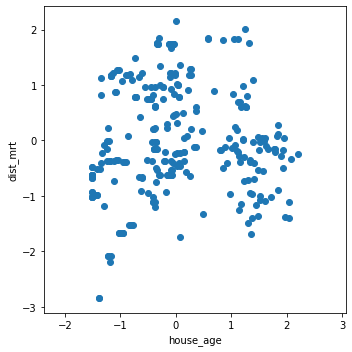

In [36]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X_train_sc.house_age, X_train_sc.dist_mrt)
ax.set_xlabel('house_age')
ax.set_ylabel('dist_mrt')
ax.axis('equal')
fig.tight_layout()

In [37]:
import plotly.express as px
fig = px.scatter_3d(x=X_train_sc.dist_mrt, y=X_train_sc.house_age, z=Y_train)
fig.update_traces(marker=dict(size=4,
                              line=dict(width=0.1,
                                        color='DarkSlateGrey')))
fig.show()

# 3. Linear Basis Model Fitting (Polynomial Basis)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [39]:
def Poly_Reg(X_train, Y_train, X_test, Y_test, m, fig=False):
    # Feature Extraction
    poly = PolynomialFeatures(degree=m)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)

    # LR Fitting
    lin = LinearRegression(fit_intercept=False)
    lin.fit(X_train_poly, Y_train)
    Y_train_pred = lin.predict(X_train_poly)
    Y_test_pred = lin.predict(X_test_poly)

    # Compute MSE
    train_MSE = np.sqrt(np.linalg.norm(Y_train - Y_train_pred)**2/Y_train.shape[0])
    test_MSE = np.sqrt(np.linalg.norm(Y_test - Y_test_pred)**2/Y_test.shape[0])

    # Visualize
    if fig is True:
        fig = px.scatter_3d(x=X_train.dist_mrt, y=X_train.house_age, z=Y_train_pred)
        fig.update_traces(marker=dict(size=3,
                                  line=dict(width=0.1,
                                            color='DarkSlateGrey')))
        fig.show()
    
    # Residual
    Resid = Y_train - Y_train_pred
    
    return {'coef':lin.coef_, 'train_MSE':train_MSE, 'test_MSE':test_MSE, 'Resid':Resid}

In [40]:
PRmodel = Poly_Reg(X_train_sc, Y_train, X_test_sc, Y_test, 2, fig=True)
PRmodel

{'coef': array([38.266, -9.409, -3.362, -1.863, -0.309,  1.736]),
 'train_MSE': 7.658409955501454,
 'test_MSE': 8.343885796510566,
 'Resid': 166   -3.709
 347    7.255
 222   -5.760
 321    2.428
 287    5.853
        ...  
 71    -0.009
 355   -0.391
 98    -0.683
 338   -7.060
 329    3.742
 Name: price, Length: 289, dtype: float64}

In [41]:
fig = px.scatter_3d(x=X_train_sc.dist_mrt, y=X_train_sc.house_age, z=PRmodel['Resid'])
fig.update_traces(marker=dict(size=3,
                                  line=dict(width=0.1,
                                            color='DarkSlateGrey')))
fig.show()

                                                        잔차 그림

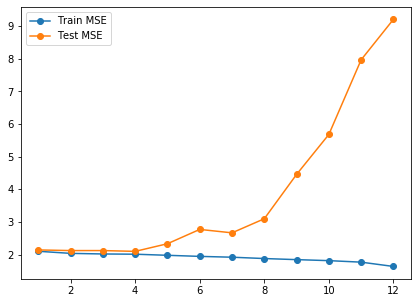

In [42]:
output = pd.DataFrame(columns=['d','Train MSE','Test MSE'])
for i in np.arange(12):
    m = i+1
    Reg = Poly_Reg(X_train_sc, Y_train, X_test_sc, Y_test, m, fig=False)
    output.loc[i] = [m, Reg['train_MSE'], Reg['test_MSE']]


fig, ax = plt.subplots(figsize=(7,5))
ax.plot(output['d'], np.log(output['Train MSE']), 'o-', label='Train MSE')
ax.plot(output['d'], np.log(output['Test MSE']), 'o-', label='Test MSE')

ax.legend()

In [43]:
poly = PolynomialFeatures(degree=2)
Phi_train = poly.fit_transform(X_train_sc)
Phi_test = poly.fit_transform(X_test_sc)
print(Phi_train.shape)
print(Phi_test.shape)

(289, 6)
(124, 6)


# 4. Regularization

## 1) Ridge Regression

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
from sklearn.linear_model import Ridge
alphas=np.logspace(-6, 6, 500)

In [59]:
def Ridge_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=False):
    
    ## How to Ridge?##
    #1. Call Ridge function as an object
    reg = Ridge()
    
    coefs = []
    train_MSE = []
    test_MSE = []
    
    for a in alphas:
        #2. Choose your lambda (Regularization coefficient)
        reg.set_params(alpha=a)
        
        #3. Fit your model
        reg.fit(Phi_train, Y_train)
        
        #4 view result with reg.coef_, reg.predict, ...
        coefs.append(reg.coef_)
    
        train_pred = reg.predict(Phi_train)
        train_MSE.append(mean_squared_error(Y_train, train_pred))
    
        test_pred = reg.predict(Phi_test)
        test_MSE.append(mean_squared_error(Y_test, test_pred))
   
    ## just for plotting purpose.. trivial ##
    #print(np.array(coefs).shape)
    
    if fig==True:
        fig = plt.figure(figsize=(14,6))

        ax1 = fig.add_subplot(121)
        labels = ['X%d'%i for i in range(Phi_train.shape[1])]
        for i in range(Phi_train.shape[1]):
            ax1.plot(alphas, np.array(coefs)[:,i], label=labels[i])
        ax1.set_xscale('log')
        ax1.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        ax1.legend()

        ax2 = fig.add_subplot(122)
        ax2.plot(alphas, train_MSE, label='Train MSE')
        ax2.plot(alphas, test_MSE, label='Test MSE')
        ax2.set_xscale('log')
        ax2.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        alpha = np.around(alphas[np.argmin(test_MSE)],3)
        ax2.text(alphas[np.argmin(test_MSE)], np.amin(test_MSE), 'alpha={0}'.format(alpha), size=15)
        ax2.legend()

        print("Weight:" ,coefs[np.argmin(test_MSE)])
        
    return {'coefs': coefs, 'train_MSE': train_MSE, 'test_MSE': test_MSE}

Weight: [ 0.    -7.674 -2.671 -1.701  0.27   1.765]


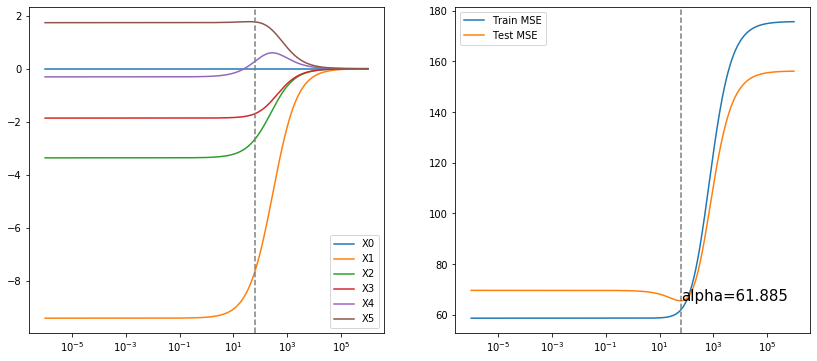

In [60]:
Ridge_output = Ridge_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=True)

## 2) Lasso Regression 

In [50]:
from sklearn.linear_model import Lasso
alphas=np.logspace(-6, 6, 500)

In [51]:
def Lasso_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=False):
    
    ## How to Lasso?##
    #1. Call Lasso function as an object
    reg = Lasso()
    
    coefs = []
    train_MSE = []
    test_MSE = []
    
    for a in alphas:
        #2. Choose your lambda (Regularization coefficient)
        reg.set_params(alpha=a)
        
        #3. Fit your model
        reg.fit(Phi_train, Y_train)
        
        #4 view result with reg.coef_, reg.predict, ...
        coefs.append(reg.coef_)
    
        train_pred = reg.predict(Phi_train)
        train_MSE.append(mean_squared_error(Y_train, train_pred))
    
        test_pred = reg.predict(Phi_test)
        test_MSE.append(mean_squared_error(Y_test, test_pred))
    
    ## just for plotting purpose.. trivial ##
    #print(np.array(coefs).shape)
    if fig==True:
        fig = plt.figure(figsize=(14,6))

        ax1 = fig.add_subplot(121)
        labels = ['X%d'%i for i in range(Phi_train.shape[1])]
        for i in range(Phi_train.shape[1]):
            ax1.plot(alphas, np.array(coefs)[:,i], label=labels[i])
        ax1.set_xscale('log')
        ax1.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        ax1.legend()

        ax2 = fig.add_subplot(122)
        ax2.plot(alphas, train_MSE, label='Train MSE')
        ax2.plot(alphas, test_MSE, label='Test MSE')
        ax2.set_xscale('log')
        ax2.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        alpha = np.around(alphas[np.argmin(test_MSE)],3)
        ax2.text(alphas[np.argmin(test_MSE)], np.amin(test_MSE), 'alpha={0}'.format(alpha), size=15)
        ax2.legend()

        print("Weight:" ,coefs[np.argmin(test_MSE)])
        
    return {'coefs': coefs, 'train_MSE': train_MSE, 'test_MSE': test_MSE}

Weight: [ 0.    -9.127 -2.462 -1.527 -0.     1.113]


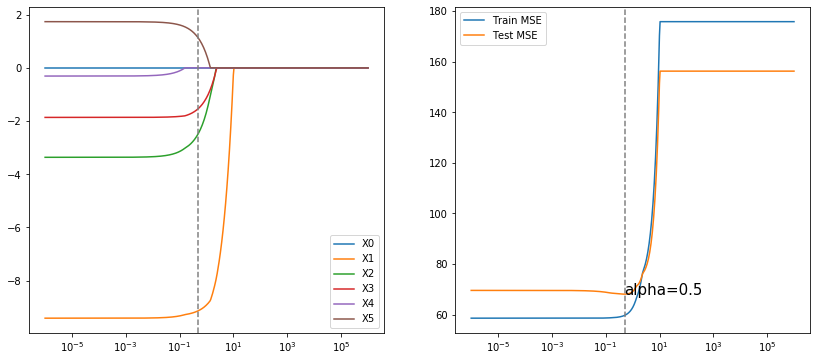

In [52]:
Lasso_output = Lasso_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=True)

# 5. k-fold CV

In [54]:
from sklearn.model_selection import KFold

kcv = KFold(n_splits=5, shuffle=True)

kcvMSE_Ridge = np.zeros((kcv.get_n_splits(), alphas.size))
kcvMSE_Lasso = np.zeros((kcv.get_n_splits(), alphas.size))

i = 0
for train_index, test_index in kcv.split(Phi_train, Y_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    CV_Phi_train, CV_Phi_test = Phi_train[train_index,:], Phi_train[test_index,:]
    CV_Y_train, CV_Y_test = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    Ridge_output = Ridge_Reg(CV_Phi_train, CV_Y_train, CV_Phi_test, CV_Y_test, alphas, fig=False)
    kcvMSE_Ridge[i, :] = Ridge_output['test_MSE']
    
    Lasso_output = Lasso_Reg(CV_Phi_train, CV_Y_train, CV_Phi_test, CV_Y_test, alphas, fig=False)
    kcvMSE_Lasso[i, :] = Lasso_output['test_MSE']
    i += 1

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  13  14  16  17  19  20  21
  22  24  25  26  27  28  29  30  31  32  33  34  35  37  39  42  43  44
  45  47  50  51  52  53  54  55  57  65  67  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  93  94
  95  96  97  98  99 100 102 103 104 106 107 109 110 111 113 114 116 117
 118 119 120 121 122 123 124 126 127 128 129 131 132 133 134 135 136 138
 139 140 142 143 144 146 147 148 149 150 151 152 154 155 158 159 160 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 184 185 186 187 188 189 190 191 192 193 194 196 197 198 199 201
 203 204 205 206 207 208 209 210 212 213 214 215 216 219 221 222 223 225
 226 227 228 230 231 232 234 236 237 238 239 240 241 242 245 246 247 248
 249 250 251 252 253 254 255 257 258 259 261 262 263 264 265 266 267 268
 270 272 274 275 277 278 279 280 281 282 283 284 285 287 288] TEST: [ 11  12  15  18  23  36  38  40  41  46  48  49 

Weight: [ 0.    -9.286 -3.313 -1.856 -0.257  1.743]


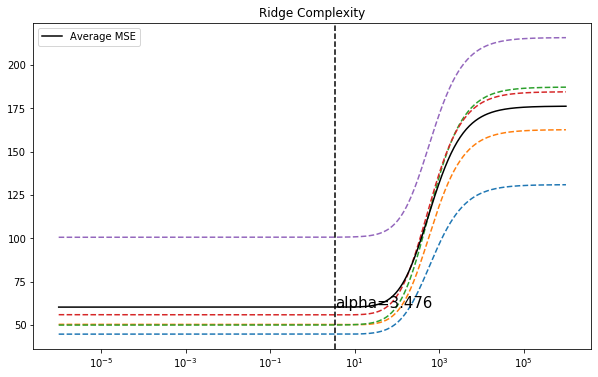

In [61]:
fig, ax= plt.subplots(figsize=(10,6))
meanMSE = np.apply_along_axis(np.mean, 1, kcvMSE_Ridge.T)
ax.plot(alphas, kcvMSE_Ridge.T, linestyle='--')
ax.plot(alphas, meanMSE, color='black', label='Average MSE')
ax.set_xscale('log')
ax.axvline(x=alphas[np.argmin(meanMSE)], linestyle='--', color='black')
alpha = np.around(alphas[np.argmin(meanMSE)],3)
ax.text(alphas[np.argmin(meanMSE)], np.amin(meanMSE), 'alpha={0}'.format(alpha), size=15)
ax.set_title('Ridge Complexity')
ax.legend()

coefs = Ridge_output['coefs']
print("Weight:" ,coefs[np.argmin(meanMSE)])
Ridge_alphas = [alphas[np.argmin(meanMSE)]]

Weight: [ 0.    -9.491 -2.636 -1.765 -0.     1.21 ]


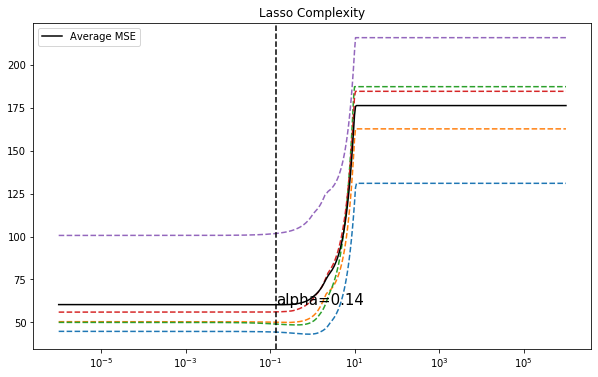

In [62]:
fig, ax= plt.subplots(figsize=(10,6))
meanMSE = np.apply_along_axis(np.mean, 1, kcvMSE_Lasso.T)
ax.plot(alphas, kcvMSE_Lasso.T, linestyle='--')
ax.plot(alphas, meanMSE, color='black', label='Average MSE')
ax.set_xscale('log')
ax.axvline(x=alphas[np.argmin(meanMSE)], linestyle='--', color='black')
alpha = np.around(alphas[np.argmin(meanMSE)],3)
ax.text(alphas[np.argmin(meanMSE)], np.amin(meanMSE), 'alpha={0}'.format(alpha), size=15)
ax.set_title('Lasso Complexity')
ax.legend()

coefs = Lasso_output['coefs']
print("Weight:" ,coefs[np.argmin(meanMSE)])
Lasso_alphas = [alphas[np.argmin(meanMSE)]]

# 6. Test MSE (which feature is the best)

### 1) Polynomial Regression

In [57]:
print(PRmodel['coef'])
print(PRmodel['test_MSE'])

[38.266 -9.409 -3.362 -1.863 -0.309  1.736]
8.343885796510566


### 2) Ridge Regression